In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = scipy.io.loadmat('./train_32x32.mat')


Adjusting dataset dimensions.

The images have 32x32 pixels. Each pixel has 3 colour values ranging from 0-255.   
These are flattened to a total of 3072 features per image.

In [30]:
# reshaping data to required format
print('X dimensions before:', dataset['X'].shape)
print('y dimensions before:', dataset['y'].shape)
x_data = dataset['X'].transpose((3,0,1,2)).reshape((73257,32*32*3))
y_data = dataset['y'].flatten()
print('X dimensions after:',x_data.shape)
print('y dimensions after:',y_data.shape)

X dimensions before: (32, 32, 3, 73257)
y dimensions before: (73257, 1)
X dimensions after: (73257, 3072)
y dimensions after: (73257,)


Selecting subset of data for training.

A

In [31]:
# random 2500 samples from dataset where dataset['y']%10 = 0 to 9
random_samples = np.empty((0,3072))
y = np.empty((0,))

for i in range(0,10):
    x_temp = x_data[y_data%10 == i]
    y_temp = y_data[y_data%10 == i]
    random_indices = np.random.choice(x_temp.shape[0], 2500)
    random_samples = np.append(random_samples,x_temp[random_indices],axis=0)
    y = np.append(y,y_temp[random_indices],axis=0)
    # print(random_samples.shape)

ten_samples = np.array([random_samples[i] for i in range(0,24999,2500)])
y_ten_samples = np.array([y[i] for i in range(0,24999,2500 )])
random_samples, y = shuffle(random_samples,y,random_state=0) # shuffle randomly in unison

**1a.** Principal Component Analysis

Creating a PCA object and fitting it to the data.

In [32]:
pca = PCA()
pca.fit(random_samples)

PCA()

Transform the data to its principal components.

In [33]:
pca_data = pca.transform(random_samples)
print(pca_data.shape)

(25000, 3072)


In [34]:
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_

Plotting Proportion of Variance (PoV) against the number of eigenvectors

Number of components required for a variance ratio of at least 0.9 is 26
Proportion of Variance for 26 components is 0.9007765095215347


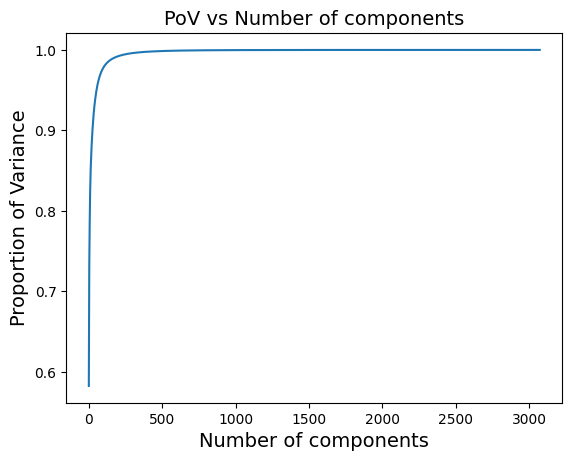

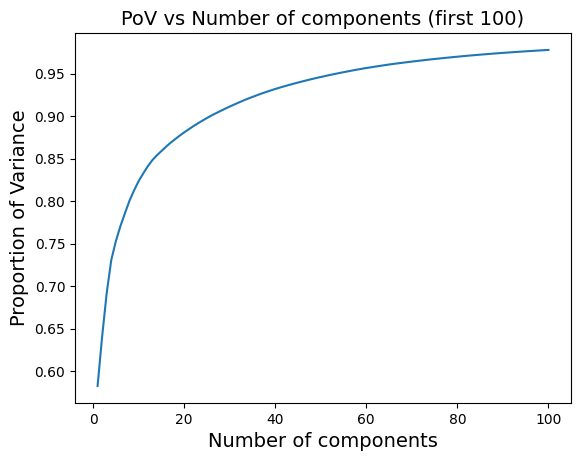

In [35]:
# cumulative sum of eigenvalues
cumulative_pov = np.cumsum(var_ratio)
num_eigen = 0
for i in range(0,len(cumulative_pov)):
    if cumulative_pov[i] >= 0.9:
        print('Number of components required for a variance ratio of at least 0.9 is', i+1)
        print('Proportion of Variance for {} components is {}'.format(i+1,cumulative_pov[i]))
        num_eigen = i+1
        break

plt.plot(range(1,len(cumulative_pov) + 1), cumulative_pov)
plt.title('PoV vs Number of components',fontsize=14)
plt.xlabel('Number of components',fontsize=14)
plt.ylabel('Proportion of Variance',fontsize=14)
plt.show()

plt.plot(range(1,101), cumulative_pov[:100])
plt.title('PoV vs Number of components (first 100)',fontsize=14)
plt.xlabel('Number of components',fontsize=14)
plt.ylabel('Proportion of Variance',fontsize=14)
plt.show()

In [36]:
# make a transform matrix for pca using only top 26 eigenvectors

# transform_matrix = eigenvectors[:num_eigen]
# trans_samples2 = np.matmul(ten_samples,transform_matrix.T)
trans_samples = pca.transform(ten_samples)




**1b.** Visualization of top 10 eigenvectors

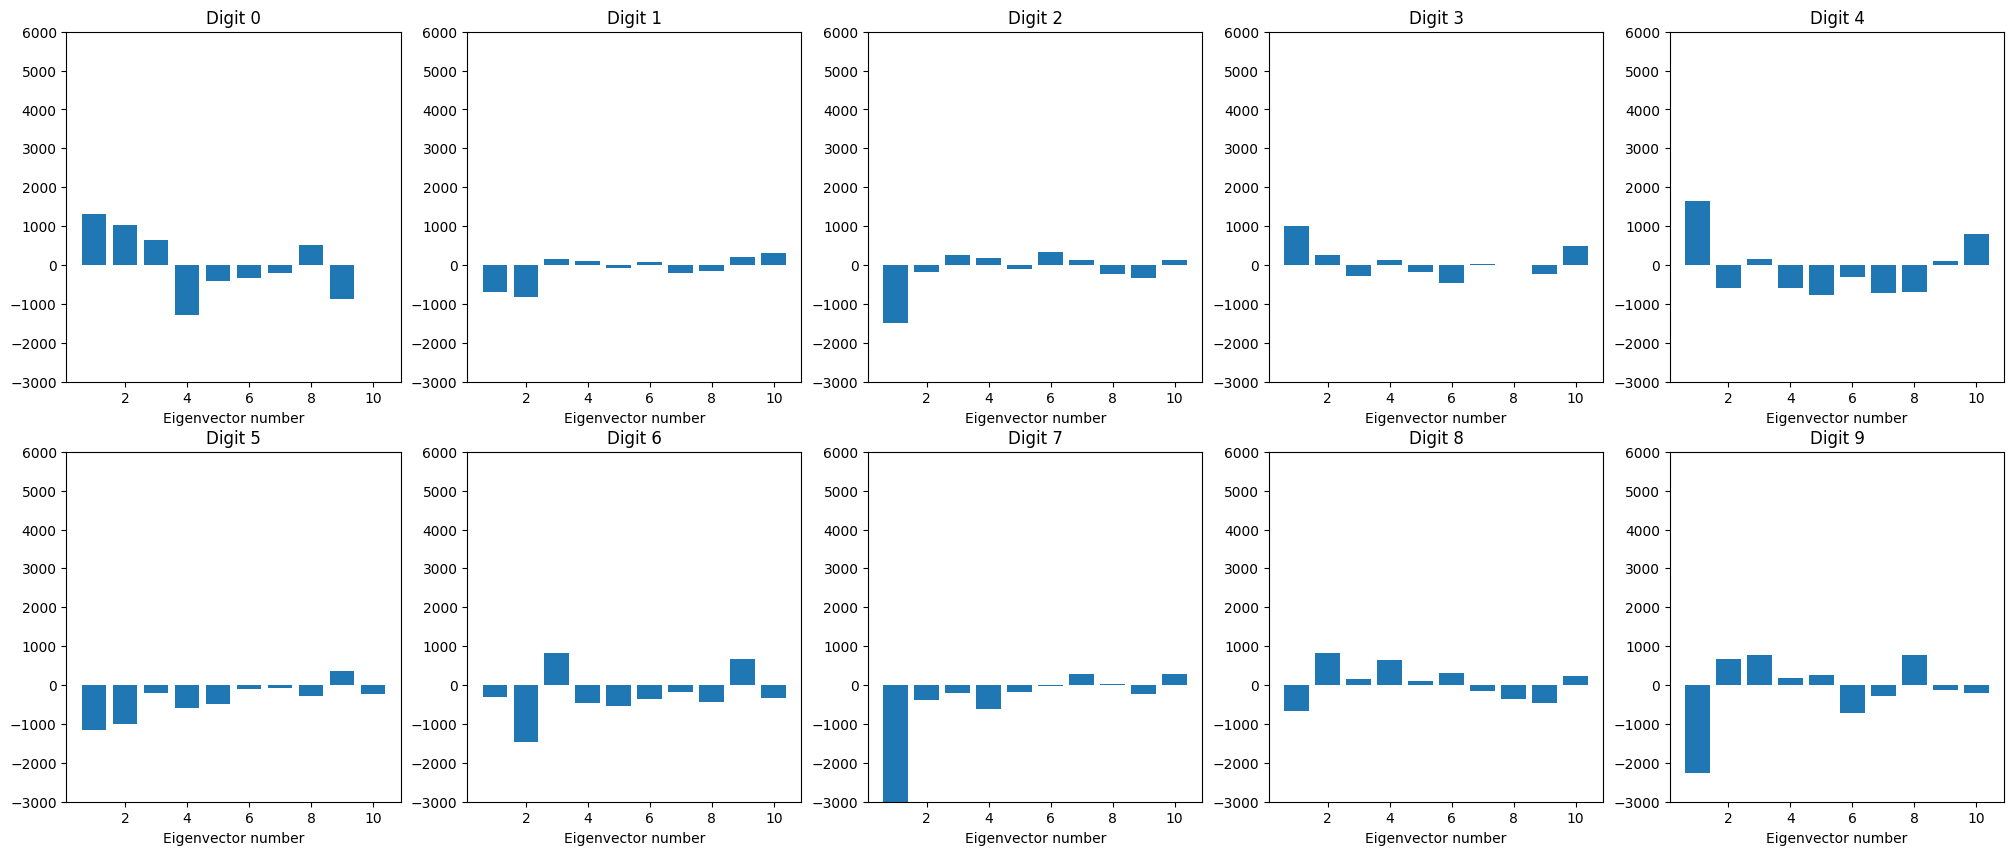

In [37]:
# for i in range(0,10):
#     print('Sample for digit', i)
#     sample_i = trans_samples[i][:10]
#     plt.bar(range(1,11), sample_i)
#     plt.show()

plt.figure(figsize=(25,10))
for i in range(0,10):
    sample_i = trans_samples[i][:10]
    ax = plt.subplot2grid((2,5), (i//5,i%5))
    ax.bar(range(1,11), sample_i)
    ax.set_ylim(-3000,6000)
    # ax.set_ylabel('Component along eigenvector')
    ax.set_xlabel('Eigenvector number')
    ax.set_title('Digit {}'.format(i))
plt.show()

In [38]:
new_transformed_data = trans_samples
new_transformed_data[:,10:] = 0

ten_samples_reconstructed = pca.inverse_transform(new_transformed_data)

print(ten_samples_reconstructed.shape)
print(new_transformed_data)
print(ten_samples_reconstructed)

(10, 3072)
[[ 1308.76736676  1029.00177461   643.97008916 ...     0.
      0.             0.        ]
 [ -704.64919029  -819.64224727   160.0352865  ...     0.
      0.             0.        ]
 [-1500.19319006  -185.59215065   248.55338549 ...     0.
      0.             0.        ]
 ...
 [-3111.39638314  -382.99802863  -204.59834825 ...     0.
      0.             0.        ]
 [ -665.14789722   828.0077194    159.83357028 ...     0.
      0.             0.        ]
 [-2250.10590384   658.23473656   777.94015958 ...     0.
      0.             0.        ]]
[[ 87.39963361  97.34694819 122.83928268 ...  82.7857049   91.96980048
  117.03710913]
 [108.17500439 104.99282674 104.13570005 ... 126.45379137 125.64702027
  122.30112426]
 [ 74.58614147  73.50739321  79.80861519 ...  75.14487465  74.87794655
   81.4941348 ]
 ...
 [ 56.08215036  53.17825268  50.92555578 ...  42.79526952  39.99571709
   42.40298328]
 [ 99.8593831  100.50548787 112.12354824 ...  70.21134408  68.17333988
   78.3527088

Comparing reconstructed images

In [39]:
def display_ten_samples(samples):
    plt.figure(figsize=(25,10))
    for i in range(0,10):
        ax = plt.subplot2grid((2,5), (i//5,i%5))
        features = samples[i].astype('uint8').reshape((32,32,3))
        ax.set_title('Digit {}'.format(i))
        ax.imshow(features)

# def features_to_image(features):
#     features = features.astype('uint8').reshape((32,32,3))
#     plt.figure()
#     plt.imshow(features)

# for sample in ten_samples:
#     features_to_image(sample)

# for sample in ten_samples_reconstructed:
#     features_to_image(sample)


Samples for each digit

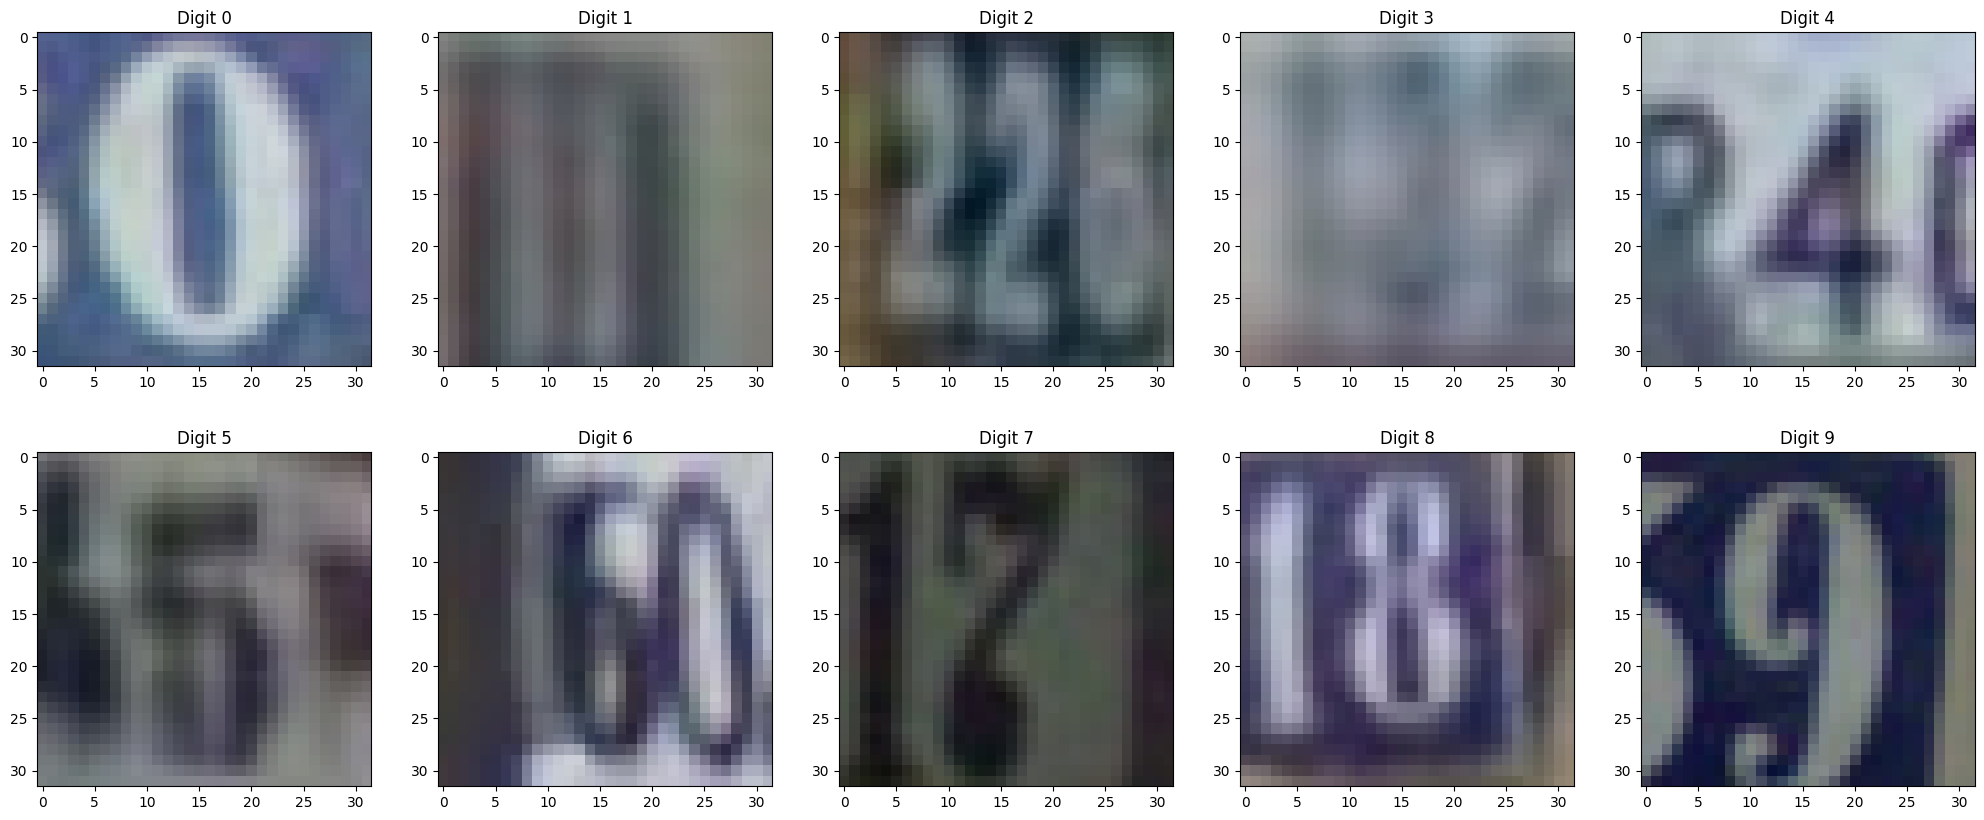

In [40]:
display_ten_samples(ten_samples)

Reconstructed samples for each digit

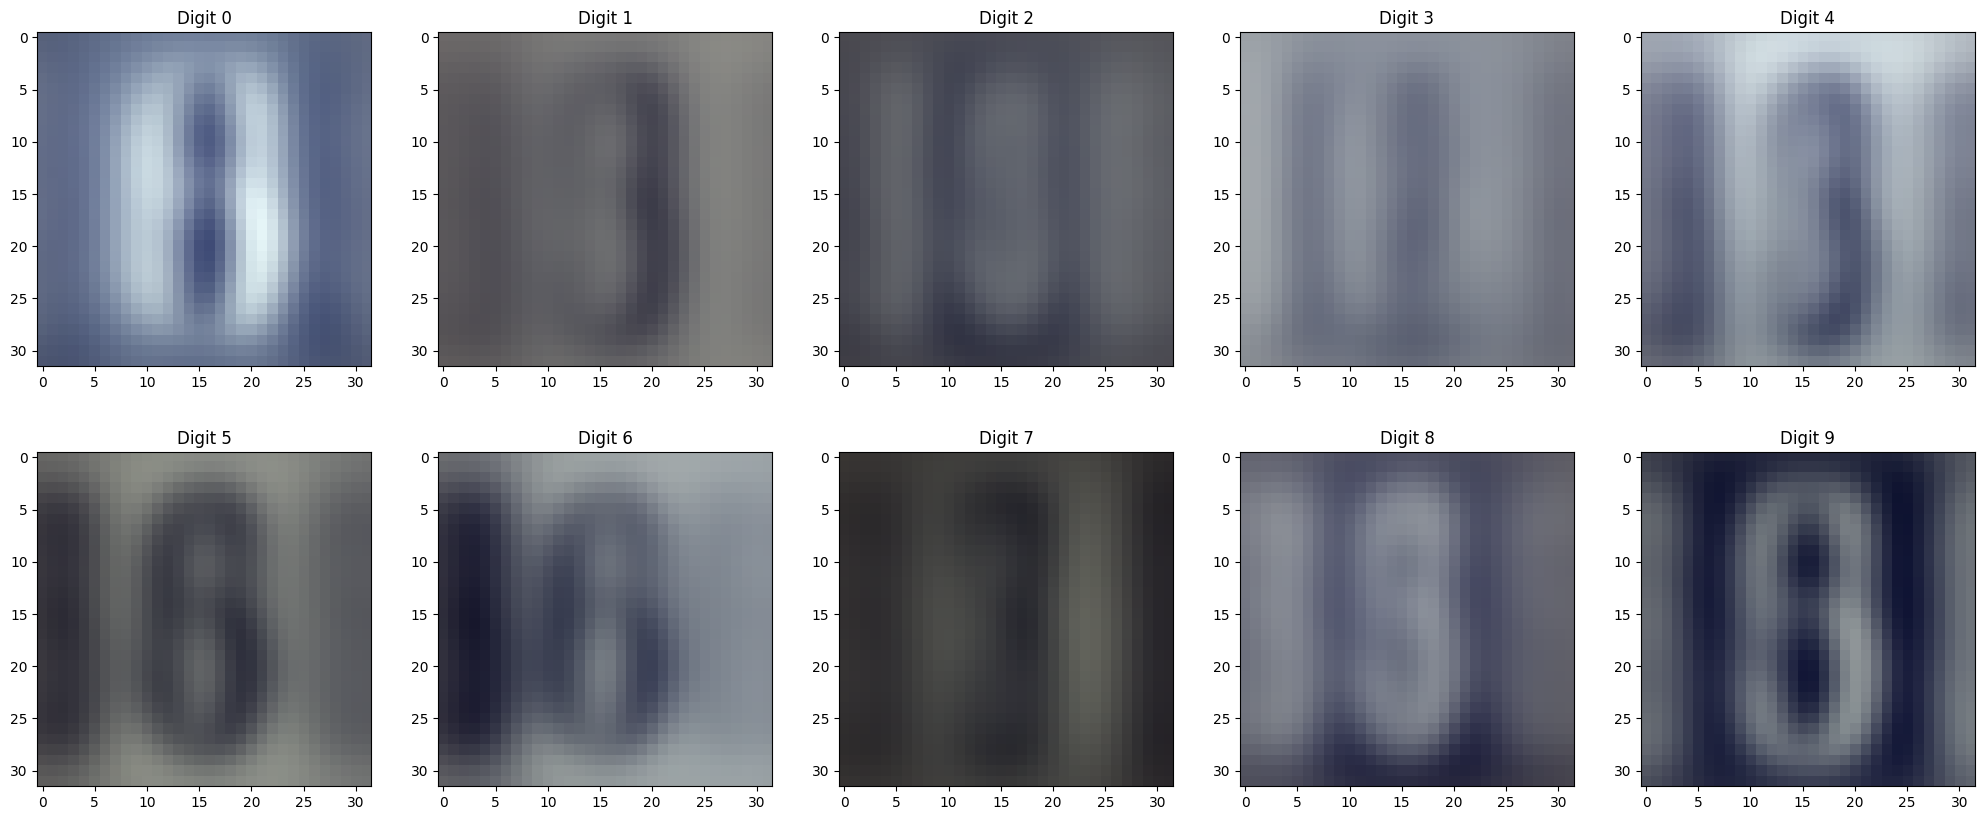

In [41]:
display_ten_samples(ten_samples_reconstructed)

Organizing data

In [42]:
# (a)
x_raw_data = random_samples
y_raw_data = y
x_pca_data = pca_data
y_pca_data = y

# (b)
x_ten_data = ten_samples
y_ten_data = y_ten_samples
x_ten_pca_data = trans_samples
y_ten_pca_data = y_ten_samples

np.save('./x_raw_data.npy',x_raw_data)
np.save('./y_raw_data.npy',y_raw_data)
np.save('./x_pca_data.npy',x_pca_data)
np.save('./y_pca_data.npy',y_pca_data)
np.save('./x_ten_data.npy',x_ten_data)
np.save('./y_ten_data.npy',y_ten_data)
np.save('./x_ten_pca_data.npy',x_ten_pca_data)
np.save('./y_ten_pca_data.npy',y_ten_pca_data)

test_dataset = scipy.io.loadmat('./test_32x32.mat')
x_test = test_dataset['X'].transpose((3,0,1,2)).reshape((26032,32*32*3))
y_test = test_dataset['y'].flatten()

In [43]:
x_test_pca = pca.transform(x_test)

**1c.** k-NN

Fitting model for k = 5

In [44]:
knn_5_raw = KNeighborsClassifier(n_neighbors=5)
knn_5_26 = KNeighborsClassifier(n_neighbors=5)
knn_5_ten = KNeighborsClassifier(n_neighbors=5)

knn_5_raw.fit(x_raw_data,y_raw_data)
knn_5_26.fit(x_pca_data[:,:26],y_pca_data)
knn_5_ten.fit(x_pca_data[:,:10],y_pca_data)

KNeighborsClassifier()

In [45]:
y_preds_raw = knn_5_raw.predict(x_test)
y_preds_26 = knn_5_26.predict(x_test_pca[:,:26])
y_preds_ten = knn_5_ten.predict(x_test_pca[:,:10])

accuracy_5_raw = accuracy_score(y_test,y_preds_raw)
accuracy_5_26 = accuracy_score(y_test,y_preds_26)
accuracy_5_ten = accuracy_score(y_test,y_preds_ten)

print('Accuracy of KNN model (k=5) on raw data is', accuracy_5_raw)
print('Accuracy of KNN model (k=5) on transformed data with only first 26 eigenvectors is', accuracy_5_26)
print('Accuracy of KNN model (k=5) on transformed data with only first ten eigenvectors is', accuracy_5_ten)

Accuracy of KNN model (k=5) on raw data is 0.37346342962507684
Accuracy of KNN model (k=5) on raw data is 0.3721957590657652
Accuracy of KNN model (k=5) on raw data is 0.22821911493546404


Fitting model for k = 7

In [46]:
knn_7_raw = KNeighborsClassifier(n_neighbors=7)
knn_7_26 = KNeighborsClassifier(n_neighbors=7)
knn_7_ten = KNeighborsClassifier(n_neighbors=7)

knn_7_raw.fit(x_raw_data,y_raw_data)
knn_7_26.fit(x_pca_data[:,:26],y_pca_data)
knn_7_ten.fit(x_pca_data[:,:10],y_pca_data)

KNeighborsClassifier(n_neighbors=7)

In [47]:
y_preds_raw = knn_7_raw.predict(x_test)
y_preds_26 = knn_7_26.predict(x_test_pca[:,:26])
y_preds_ten = knn_7_ten.predict(x_test_pca[:,:10])

accuracy_7_raw = accuracy_score(y_test,y_preds_raw)
accuracy_7_26 = accuracy_score(y_test,y_preds_26)
accuracy_7_ten = accuracy_score(y_test,y_preds_ten)

print('Accuracy of KNN model (k=7) on raw data is', accuracy_7_raw)
print('Accuracy of KNN model (k=7) on transformed data with only first 26 eigenvectors is', accuracy_7_26)
print('Accuracy of KNN model (k=7) on transformed data with only first ten eigenvectors is', accuracy_7_ten)

Accuracy of KNN model (k=7) on raw data is 0.38663952059004303
Accuracy of KNN model (k=7) on raw data is 0.3816840811309158
Accuracy of KNN model (k=7) on raw data is 0.2387062077443147
